In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf

import os
import sys
import time

from tensorflow import keras



In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
dir(housing)
print(housing.DESCR)
print("=" * 100)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

# default test_size is 0.25
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=7
)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11
)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [9]:
learing_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2] 

histories = []

for lr in learing_rates:
    model = keras.models.Sequential([
       keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
       keras.layers.Dense(1)
    ])
    
    optimzer = keras.optimizers.SGD(lr)
    
    model.compile(loss="mean_squared_error", optimizer=optimzer)
    
    callbacks = [
        keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
    ]
    
    history = model.fit(
        x_train_scaled, y_train, 
        validation_data=(x_valid_scaled, y_valid),
        epochs=100,
        callbacks=callbacks
    )
    
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 75us/sample - loss: 3.3166 - val_loss: 3.0224
Epoch 2/100
11610/11610 [==============================] - 1s 46us/sample - loss: 2.5297 - val_loss: 2.3436
Epoch 3/100
11610/11610 [==============================] - 1s 49us/sample - loss: 1.9846 - val_loss: 1.8754
Epoch 4/100
11610/11610 [==============================] - 1s 46us/sample - loss: 1.6094 - val_loss: 1.5530
Epoch 5/100
11610/11610 [==============================] - 1s 48us/sample - loss: 1.3541 - val_loss: 1.3340
Epoch 6/100
11610/11610 [==============================] - 1s 48us/sample - loss: 1.1818 - val_loss: 1.1863
Epoch 7/100
11610/11610 [==============================] - 1s 47us/sample - loss: 1.0662 - val_loss: 1.0862
Epoch 8/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.9874 - val_loss: 1.0177
Epoch 9/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.932

11610/11610 [==============================] - 1s 47us/sample - loss: 0.5726 - val_loss: 0.6191
Epoch 76/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.5708 - val_loss: 0.6170
Epoch 77/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.5690 - val_loss: 0.6151
Epoch 78/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5672 - val_loss: 0.6131
Epoch 79/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5655 - val_loss: 0.6111
Epoch 80/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5638 - val_loss: 0.6092
Epoch 81/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5621 - val_loss: 0.6073
Epoch 82/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5604 - val_loss: 0.6055
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 104us/sample - loss: 3.8381 - 

11610/11610 [==============================] - 1s 55us/sample - loss: 0.7019 - val_loss: 0.7426
Epoch 4/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.6608 - val_loss: 0.7026
Epoch 5/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.6284 - val_loss: 0.6720
Epoch 6/100
11610/11610 [==============================] - 1s 50us/sample - loss: 0.6028 - val_loss: 0.6461
Epoch 7/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5820 - val_loss: 0.6251
Epoch 8/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5652 - val_loss: 0.6069
Epoch 9/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.5513 - val_loss: 0.5920
Epoch 10/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5398 - val_loss: 0.5810
Epoch 11/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.5295 - val_loss: 0.5697
Epoch 12/100
11610/11610 [============

11610/11610 [==============================] - 1s 49us/sample - loss: 0.3715 - val_loss: 0.3828
Epoch 14/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3688 - val_loss: 0.3793
Epoch 15/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3654 - val_loss: 0.3838
Epoch 16/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3650 - val_loss: 0.3741
Epoch 17/100
11610/11610 [==============================] - 2s 134us/sample - loss: 0.3609 - val_loss: 0.3716
Epoch 18/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.3596 - val_loss: 0.3707
Epoch 19/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3586 - val_loss: 0.3729
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 71us/sample - loss: nan - val_loss: nan
Epoch 2/100
11610/11610 [==============================] - 1s 47us/sample - loss: nan - val_loss: 

learnint_rate: 0.0001


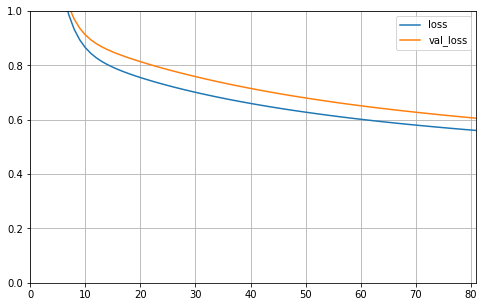

learnint_rate: 0.0003


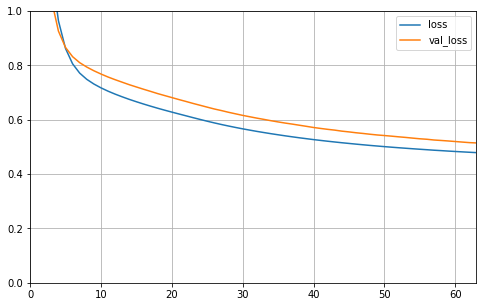

learnint_rate: 0.001


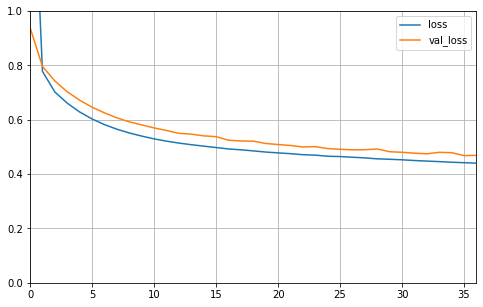

learnint_rate: 0.003


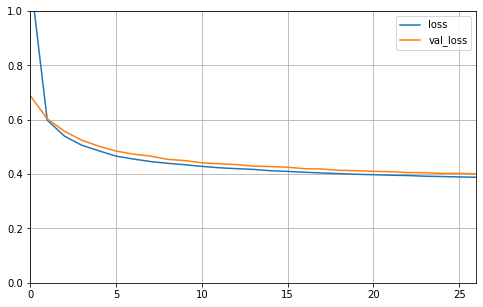

learnint_rate: 0.01


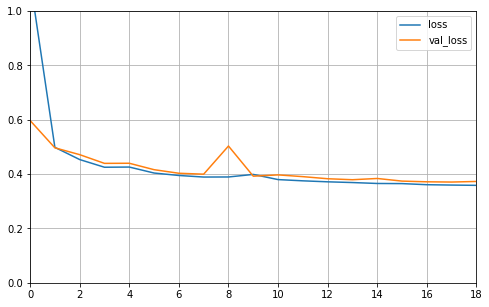

learnint_rate: 0.03


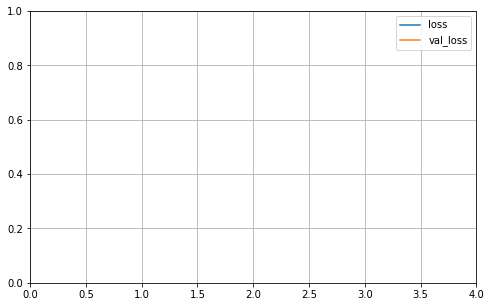

In [12]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

for lr, history in zip(learing_rates, histories):
    print(f"learnint_rate: {lr}")
    plot_learning_curve(history)

In [ ]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test)